In [1]:
import pandas as pd

In [2]:
traindata = pd.read_csv('customer_train_addBikeBuy.csv',encoding = 'utf-8-sig',index_col = 0) 
traindata.dtypes


CustomerID               int64
City                    object
StateProvinceName       object
CountryRegionName       object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
Age                      int64
BikeBuyer                int64
dtype: object

In [3]:
traindata.head()

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,Rockhampton,Queensland,Australia,Bachelors,Professional,M,M,0,0,2,137947,32,0
1,11001,Seaford,Victoria,Australia,Bachelors,Professional,M,S,1,3,3,101141,33,1
2,11002,Hobart,Tasmania,Australia,Bachelors,Professional,M,M,1,3,3,91945,33,0
3,11003,North Ryde,New South Wales,Australia,Bachelors,Professional,F,S,1,0,0,86688,30,0
4,11004,Wollongong,New South Wales,Australia,Bachelors,Professional,F,S,4,5,5,92771,30,1


In [4]:
traindata[traindata['BikeBuyer'] == 0].shape[0]/traindata['BikeBuyer'].shape[0]

0.6683682771194166

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
#轉換工作
new_clos = pd.get_dummies(traindata['Occupation'])
new_clos

,Clerical,Management,Manual,Professional,Skilled Manual
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
16744,1,0,0,0,0
16745,1,0,0,0,0
16746,1,0,0,0,0
16747,1,0,0,0,0


In [7]:
#轉換性別 婚姻
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

traindata['Gender']=le.fit_transform(traindata['Gender'])
traindata['MaritalStatus']=le.fit_transform(traindata['MaritalStatus'])
traindata

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,Rockhampton,Queensland,Australia,Bachelors,Professional,1,0,0,0,2,137947,32,0
1,11001,Seaford,Victoria,Australia,Bachelors,Professional,1,1,1,3,3,101141,33,1
2,11002,Hobart,Tasmania,Australia,Bachelors,Professional,1,0,1,3,3,91945,33,0
3,11003,North Ryde,New South Wales,Australia,Bachelors,Professional,0,1,1,0,0,86688,30,0
4,11004,Wollongong,New South Wales,Australia,Bachelors,Professional,0,1,4,5,5,92771,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,Stoke-on-Trent,England,United Kingdom,Graduate Degree,Clerical,1,1,0,0,3,45986,39,0
16745,29479,Versailles,Yveline,France,Graduate Degree,Clerical,1,0,0,0,1,80049,40,0
16746,29480,London,England,United Kingdom,Graduate Degree,Clerical,0,1,0,0,3,60417,38,1
16747,29481,Hof,Bayern,Germany,Graduate Degree,Clerical,1,1,0,0,3,66653,38,0


In [8]:
#轉換教育
traindata['Education'].unique()

array(['Bachelors ', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [9]:
Education_mapping = {'Partial High School' : 1,
                     'High School' : 2,
                     'Partial College' : 3,
                     'Bachelors ' : 4,
                     'Graduate Degree' : 5 }

traindata['Education'] = traindata['Education'].map(Education_mapping)
traindata

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,Rockhampton,Queensland,Australia,4,Professional,1,0,0,0,2,137947,32,0
1,11001,Seaford,Victoria,Australia,4,Professional,1,1,1,3,3,101141,33,1
2,11002,Hobart,Tasmania,Australia,4,Professional,1,0,1,3,3,91945,33,0
3,11003,North Ryde,New South Wales,Australia,4,Professional,0,1,1,0,0,86688,30,0
4,11004,Wollongong,New South Wales,Australia,4,Professional,0,1,4,5,5,92771,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,Stoke-on-Trent,England,United Kingdom,5,Clerical,1,1,0,0,3,45986,39,0
16745,29479,Versailles,Yveline,France,5,Clerical,1,0,0,0,1,80049,40,0
16746,29480,London,England,United Kingdom,5,Clerical,0,1,0,0,3,60417,38,1
16747,29481,Hof,Bayern,Germany,5,Clerical,1,1,0,0,3,66653,38,0


In [10]:
# 標準化年收入
cols= ['YearlyIncome']
X = traindata[cols]

from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X)

X_std = standard.fit_transform(X)

print(standard.mean_,standard.var_)#平均數 標準差
print(X_std.shape)
traindata['YearlyIncome.std']=X_std

[78159.38887876] [1.57748316e+09]
(16455, 1)


In [11]:
#加入"BikeBuyer" 與其他變數合併 
features = traindata[['BikeBuyer','Education','Age','TotalChildren','NumberCarsOwned','Gender','MaritalStatus','NumberChildrenAtHome','YearlyIncome.std']]

alldata = pd.concat([features,new_clos], axis=1)
alldata

,BikeBuyer,Education,Age,TotalChildren,NumberCarsOwned,Gender,MaritalStatus,NumberChildrenAtHome,YearlyIncome.std,Clerical,Management,Manual,Professional,Skilled Manual
0,0,4,32,2,0,1,0,0,1.505320,0,0,0,1,0
1,1,4,33,3,1,1,1,3,0.578626,0,0,0,1,0
2,0,4,33,3,1,1,0,3,0.347091,0,0,0,1,0
3,0,4,30,0,1,0,1,0,0.214732,0,0,0,1,0
4,1,4,30,5,4,0,1,5,0.367888,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,0,5,39,3,0,1,1,0,-0.810055,1,0,0,0,0
16745,0,5,40,1,0,1,0,0,0.047576,1,0,0,0,0
16746,1,5,38,3,0,0,1,0,-0.446714,1,0,0,0,0
16747,0,5,38,3,0,1,1,0,-0.289705,1,0,0,0,0


In [12]:
#alldata.to_csv('bikebuyer_transform.csv', index = False)


# 建立logistic regression

In [13]:
y = alldata.iloc[:,0] #預測BikeBuyer
X = alldata.iloc[:, 1: ]

In [14]:
#分割alldata為 train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.3 , random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11518, 13), (4937, 13), (11518,), (4937,))

In [15]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver = 'lbfgs',multi_class = 'auto',max_iter=500 )
lr.fit(X_train,y_train)


LogisticRegression(max_iter=500)

In [16]:
print('coef :',lr.coef_)
print('intercept :',lr.intercept_)

coef : [[ 0.155716   -0.03473186  0.04662644 -0.0615765   0.65713461  1.51164853
   0.73518827  0.49556087 -0.35696759 -0.79842605 -0.15695765 -0.12047825
  -0.17192598]]
intercept : [-1.66848864]


In [17]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.7831220698037854, 0.7915738302612922)

In [18]:
#16455個predict
lr.predict(X)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [19]:
#16455個predict分到0 1的機率
lr.predict_proba(X)

array([[0.6859295 , 0.3140705 ],
       [0.08112635, 0.91887365],
       [0.30986454, 0.69013546],
       ...,
       [0.75704258, 0.24295742],
       [0.59906993, 0.40093007],
       [0.89934718, 0.10065282]])

# 分類預測

In [20]:
true_y = alldata.iloc[:,0]
true_y.reset_index(drop = True , inplace=True)#消除nan

predict_y = pd.DataFrame(lr.predict(X),columns=['predict_BikeBuyer'])
predict_y_prob = pd.DataFrame(lr.predict_proba(X),columns=['prob_0','prob_1'])


new_col = pd.concat([predict_y_prob,predict_y,true_y], axis = 1)
new_col
#true_y.shape,predict_y.shape,predict_y_prob.shape

,prob_0,prob_1,predict_BikeBuyer,BikeBuyer
0,0.685930,0.314070,0,0
1,0.081126,0.918874,1,1
2,0.309865,0.690135,1,0
3,0.657365,0.342635,0,0
4,0.041144,0.958856,1,1
...,...,...,...,...
16450,0.666898,0.333102,0,0
16451,0.870886,0.129114,0,0
16452,0.757043,0.242957,0,1
16453,0.599070,0.400930,0,0


# K-fold 

In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr , X_train , y_train , cv = 5)
score,score.mean()

(array([0.78689236, 0.77430556, 0.78298611, 0.78940512, 0.77681285]),
 0.7820804008660203)

# 特徵篩選

In [22]:
from sklearn.feature_selection import SelectFromModel 
selector = SelectFromModel(estimator = LogisticRegression(solver = 'lbfgs',multi_class = 'auto',max_iter=500 )).fit(X_train,y_train)
selector.estimator_.coef_

array([[ 0.155716  , -0.03473186,  0.04662644, -0.0615765 ,  0.65713461,
         1.51164853,  0.73518827,  0.49556087, -0.35696759, -0.79842605,
        -0.15695765, -0.12047825, -0.17192598]])

In [23]:
selector.estimator_.coef_.reshape(13,1)

array([[ 0.155716  ],
       [-0.03473186],
       [ 0.04662644],
       [-0.0615765 ],
       [ 0.65713461],
       [ 1.51164853],
       [ 0.73518827],
       [ 0.49556087],
       [-0.35696759],
       [-0.79842605],
       [-0.15695765],
       [-0.12047825],
       [-0.17192598]])

In [24]:
selector.threshold_

0.40791835398953136

In [25]:
#特徵重要性
selector.get_support(),X_train.columns

(array([False, False, False, False,  True,  True,  True,  True, False,
         True, False, False, False]),
 Index(['Education', 'Age', 'TotalChildren', 'NumberCarsOwned', 'Gender',
        'MaritalStatus', 'NumberChildrenAtHome', 'YearlyIncome.std', 'Clerical',
        'Management', 'Manual', 'Professional', 'Skilled Manual'],
       dtype='object'))

# 做特徵篩選減少變數

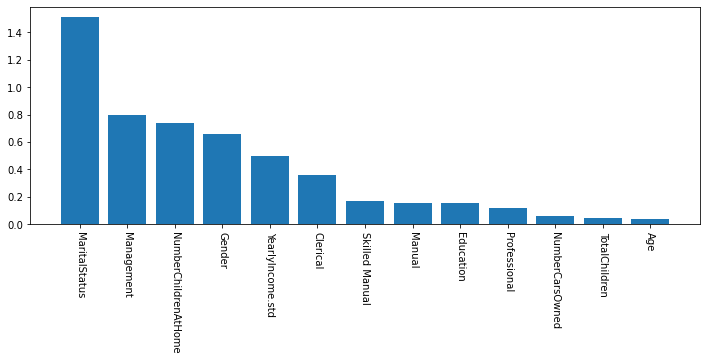

,coef
MaritalStatus,1.511649
NumberChildrenAtHome,0.735188
Gender,0.657135
YearlyIncome.std,0.495561
Education,0.155716
TotalChildren,0.046626
Age,-0.034732
NumberCarsOwned,-0.061576
Professional,-0.120478
Manual,-0.156958


In [26]:
# 畫圖 從高到低 去畫出 特徵重要性
feature_names = ['Education', 'Age', 'TotalChildren', 'NumberCarsOwned', 'Gender',
        'MaritalStatus', 'NumberChildrenAtHome', 'YearlyIncome.std', 'Clerical',
        'Management', 'Manual', 'Professional', 'Skilled Manual']
%matplotlib inline
import matplotlib.pyplot as plt
# 使用table 方式進行排序
feature_importances_sort = pd.DataFrame(abs(selector.estimator_.coef_.reshape(13,1)), columns=['score'])
feature_importances_sort['feature'] = feature_names
feature_importances_sort = feature_importances_sort.sort_values(by='score', ascending=False)
# 使用table 方式進行排序
plt.figure(figsize=(12, 4))
plt.bar(feature_importances_sort['feature'] , feature_importances_sort['score'])
plt.xticks(rotation=-90)
plt.show()

import numpy as np
np.set_printoptions(suppress=True) # 改科學記號

new_coef= pd.DataFrame(lr.coef_.reshape(-1,1),X_train.columns, columns=['coef']) 
new_coef

new_coef_sort = new_coef.sort_values(by='coef', ascending=False)
new_coef_sort

# 選前5個再做一個logit model

In [27]:
cols=['MaritalStatus', 'NumberChildrenAtHome', 'Gender', 'YearlyIncome.std','Education']
lr2 = LogisticRegression()
lr2.fit(X_train[cols],y_train)

print('coef :',lr2.coef_)
print('intercept :',lr2.intercept_)

lr2.score(X_train[cols],y_train),lr2.score(X_test[cols],y_test)

coef : [[1.56219876 0.75023361 0.70891838 0.29608127 0.18675521]]
intercept : [-3.32869039]


(0.776089598888696, 0.781648774559449)

In [28]:
# #KBest

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# new_lr = SelectKBest(chi2 , k=5).fit(X_train,y_train)
# X_new = new_lr.transform(X_train)

In [29]:
# new_lr.scores_,new_lr.pvalues_
# selector.get_support()

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

cols=['MaritalStatus', 'NumberChildrenAtHome', 'Gender', 'YearlyIncome.std','Education']
lr2 = LogisticRegression()
lr2.fit(X_train[cols],y_train)

print('coef :',lr2.coef_)
print('intercept :',lr2.intercept_)

lr2.score(X_train[cols],y_train),lr2.score(X_test[cols],y_test)

y_pred = lr2.predict(X_test[cols])

c_matrix = confusion_matrix(y_test,y_pred)
c_report = classification_report(y_test,y_pred)
print(c_matrix)
print(c_report)

coef : [[1.56219876 0.75023361 0.70891838 0.29608127 0.18675521]]
intercept : [-3.32869039]
[[2986  335]
 [ 743  873]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      3321
           1       0.72      0.54      0.62      1616

    accuracy                           0.78      4937
   macro avg       0.76      0.72      0.73      4937
weighted avg       0.78      0.78      0.77      4937



# 預測500新客戶會不會買?

In [31]:
testdata = pd.read_csv('bikebuyer_transform_test.csv',encoding = 'utf-8-sig',index_col = False) 
testdata.columns

Index(['BikeBuyer', 'Education', 'Age', 'TotalChildren', 'NumberCarsOwned',
       'Gender', 'MaritalStatus', 'NumberChildrenAtHome', 'YearlyIncome.std',
       'Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual'],
      dtype='object')

In [32]:
testdata_predict = lr2.predict(testdata.iloc[:,[5,6,7,8,10]])
testdata_predict_prob = lr.predict_proba(testdata.iloc[:,1:])

testdata_predict

c:\python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Management
Feature names seen at fit time, yet now missing:
- Education

  warnings.warn(message, FutureWarning)


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [33]:
# registic regression 500 result (Accruacy/precision/recall f1-score)
predict_buyer = testdata_predict
true_buyer = testdata.iloc[:,0]

from sklearn.metrics import confusion_matrix,classification_report
c_matrix = confusion_matrix(predict_buyer,true_buyer)
c_report = classification_report(predict_buyer,true_buyer)
print(c_matrix)
print(c_report)

[[302 108]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       410
           1       0.39      0.78      0.52        90

    accuracy                           0.74       500
   macro avg       0.67      0.76      0.67       500
weighted avg       0.84      0.74      0.77       500



# 額外嘗試

In [34]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [35]:
smote = SMOTE(sampling_strategy='auto',k_neighbors = 6, random_state=123)
smt = SMOTETomek(sampling_strategy='auto',smote = smote , random_state=123)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [36]:
selector = SelectFromModel(estimator = LogisticRegression(solver = 'lbfgs',multi_class = 'auto',max_iter=500 )).fit(X_resampled,y_resampled)
selector.estimator_.coef_

array([[ 0.10017386, -0.04044011,  0.046833  , -0.16670398,  0.46585504,
         1.48730549,  0.86425812,  0.74490642, -2.34882207, -3.19824077,
        -2.15179839, -2.26741491, -2.35390513]])

In [37]:
selector.get_support(),X_train.columns

(array([False, False, False, False, False,  True, False, False,  True,
         True,  True,  True,  True]),
 Index(['Education', 'Age', 'TotalChildren', 'NumberCarsOwned', 'Gender',
        'MaritalStatus', 'NumberChildrenAtHome', 'YearlyIncome.std', 'Clerical',
        'Management', 'Manual', 'Professional', 'Skilled Manual'],
       dtype='object'))

In [50]:
cols=['MaritalStatus','NumberChildrenAtHome','Clerical','Management', 'Manual', 'Professional', 'Skilled Manual']
lr3 = LogisticRegression()
lr3.fit(X_resampled[cols],y_resampled)

print('coef :',lr3.coef_)
print('intercept :',lr3.intercept_)

lr3.score(X_resampled[cols],y_resampled),lr3.score(X_test[cols],y_test)

coef : [[ 1.42962825  0.8808679  -2.24193836 -2.10588673 -2.55927198 -1.48155554
  -1.86527757]]
intercept : [0.27369597]


(0.7645223592333977, 0.7496455337249341)

In [51]:
y_pred = lr3.predict(X_test[cols])

c_matrix = confusion_matrix(y_test,y_pred)
c_report = classification_report(y_test,y_pred)
print(c_matrix)
print(c_report)

[[2607  714]
 [ 522 1094]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3321
           1       0.61      0.68      0.64      1616

    accuracy                           0.75      4937
   macro avg       0.72      0.73      0.72      4937
weighted avg       0.76      0.75      0.75      4937



In [40]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(n_estimators=100,
                            criterion='gini',#entropy
                            max_depth=5,
                            min_samples_split = 20,
                            min_samples_leaf = 1,
                            bootstrap=True) # default max_depth that nodes are expanded until all leaves are pure
#clf.fit(X_train, y_train)
cols = ['MaritalStatus', 'NumberChildrenAtHome', 'Gender', 'YearlyIncome.std','Education']
#建立train模型
clf.fit(X_train[cols],y_train)


RandomForestClassifier(max_depth=5, min_samples_split=20)

In [41]:
#訓練資料評估 測試資料評估 
clf.score(X_train[cols], y_train), clf.score(X_test[cols], y_test)

(0.7807779128320889, 0.7834717439740734)

In [42]:
# 特徵重要性
clf.feature_importances_, X_train.columns

(array([0.13581564, 0.60114862, 0.03974388, 0.19186201, 0.03142985]),
 Index(['Education', 'Age', 'TotalChildren', 'NumberCarsOwned', 'Gender',
        'MaritalStatus', 'NumberChildrenAtHome', 'YearlyIncome.std', 'Clerical',
        'Management', 'Manual', 'Professional', 'Skilled Manual'],
       dtype='object'))

In [43]:
[*zip(X_train.columns,clf.feature_importances_)]

[('Education', 0.13581563723170564),
 ('Age', 0.6011486159732421),
 ('TotalChildren', 0.03974388116082499),
 ('NumberCarsOwned', 0.19186201495762484),
 ('Gender', 0.03142985067660258)]

In [44]:
#testdata_predict = xgbc.predict(testdata.iloc[:,[5,6,7,8,10]])
testdata_predict = clf.predict(testdata[cols])
predict_buyer = testdata_predict
true_buyer = testdata.iloc[:,0]

c_matrix = confusion_matrix(predict_buyer,true_buyer)
c_report = classification_report(predict_buyer,true_buyer)
print(c_matrix)
print(c_report)

[[286  74]
 [ 36 104]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       360
           1       0.58      0.74      0.65       140

    accuracy                           0.78       500
   macro avg       0.74      0.77      0.75       500
weighted avg       0.80      0.78      0.79       500



In [45]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimator = 2,
                    max_depth = None)#xgb最多6
print(xgbc)

cols = ['MaritalStatus', 'NumberChildrenAtHome', 'Gender', 'YearlyIncome.std','Education']
#建立train模型
xgbc.fit(X_train[cols],y_train)
print(xgbc.score(X_train[cols],y_train),xgbc.score(X_test[cols],y_test))

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=2, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[13:10:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open 

In [46]:
#testdata_predict = xgbc.predict(testdata.iloc[:,[5,6,7,8,10]])
testdata_predict = xgbc.predict(testdata[cols])
predict_buyer = testdata_predict
true_buyer = testdata.iloc[:,0]

c_matrix = confusion_matrix(predict_buyer,true_buyer)
c_report = classification_report(predict_buyer,true_buyer)
print(c_matrix)
print(c_report)

[[286  78]
 [ 36 100]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       364
           1       0.56      0.74      0.64       136

    accuracy                           0.77       500
   macro avg       0.72      0.76      0.74       500
weighted avg       0.80      0.77      0.78       500

